# Random Forest Guided Example Drill
Unit 3 / Lesson 2 / Project 5

We've talked about Random Forests, now it's time to build one.

Here we'll use data from Lending Club to predict the state of a loan given some information about it.
You can find the dataset [here](https://www.lendingclub.com/info/download-data.action).
We'll use 2015 data: ([Thinkful mirror](https://www.dropbox.com/s/m7z42lubaiory33/LoanStats3d.csv?dl=0)).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## DRILL: Third Attempt

So here's your task.
Get rid of as much data as possible without dropping below an average of 90% accuracy in a 10-fold cross validation.

You'll want to do a few things in this process.
First, dive into the data that we have and see which features are most important.
This can be the raw features or the generated dummies.
You may want to use PCA or correlation matrices.

Can you do it without using anything related to payment amount or outstanding principal? How do you know?

In [2]:
# Replace the path with the correct path for your data.
PATH = ('assets/y2015.csv'
)

y2015 = pd.read_csv(
    PATH,
    index_col=0
)

# Note the warning about dtypes.

C:\Users\Aaron\AppData\Local\Programs\Python\Python37\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (48) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
y2015.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,10+ years,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,35000.0,35000.0,35000.0,60 months,12.88,794.21,C,7 years,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,20000.0,20000.0,20000.0,60 months,13.99,465.27,C,10+ years,...,NaN,NaN,Cash,Y,Nov-2017,COMPLETE,Sep-2017,9915.0,55.0,1.0
3,NaN,NaN,20000.0,20000.0,20000.0,36 months,12.88,672.73,C,10+ years,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,14025.0,14025.0,14025.0,60 months,18.49,359.90,D,10+ years,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


### Model

Let's try this model again.

We're also going to drop NA columns, rather than impute, because our data is rich enough that we can probably get away with it.

This model may take a few minutes to run.

In [4]:
from sklearn import ensemble
from sklearn.model_selection import cross_val_score

rfc = ensemble.RandomForestClassifier(n_estimators=10)
X = y2015.drop('loan_status', axis=1)
y = y2015['loan_status']

In [5]:
X = pd.get_dummies(X)
X = X.dropna(axis=1)

In [6]:
score = cross_val_score(rfc, X, y, cv=10)
display(score)
print("Model Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))

C:\Users\Aaron\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Aaron\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Aaron\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Aaron\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in versio

array([0.99005058, 0.99054924, 0.99000261, 0.99069105, 0.99254334,
       0.99218694, 0.99232925, 0.9928278 , 0.9915216 , 0.99301779])

Model Accuracy: 0.99 (+/- 0.00)


Our model has an accuracy of 98%, that's a little *too high*.
Let's see if we can tweak our model.

Let's take a look at our features and see if we can wittle away at them to improve our model's performance.

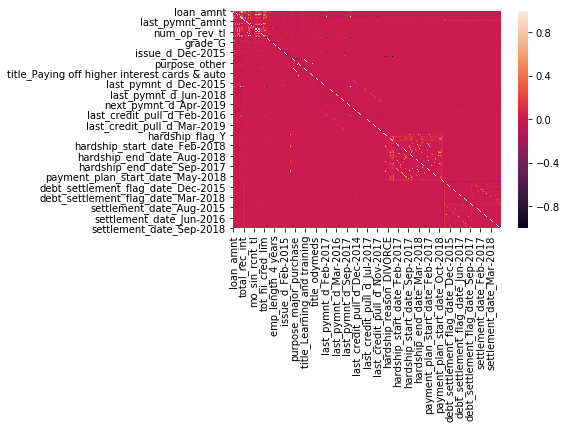

In [7]:
import seaborn as sns

# plot a heatmap
sns.heatmap(X.corr())

Well that's not going to help.
We have close to 200 features, visualizing the correlation won't get us  very far.

Let's try dropping any features with a correlation over 90%.

In [8]:
# Create correlation matrix
corr_matrix = X.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.90
to_drop = [column for column in upper.columns if any(upper[column] > 0.90)]

In [9]:
display(X.shape)
# Drop correlated features 
for i in to_drop:
    X = X.drop(i, axis=1)

X.shape

(421095, 442)

(421095, 405)

We started with 201 features and ended up with 174 after dropping correlated features.

Let's perform some PCA and see if we can fine tune our model even more.

In [10]:
# split data into training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0)

In [11]:
# standardize data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [12]:
# fit training set
scaler.fit(X_train)

C:\Users\Aaron\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


StandardScaler(copy=True, with_mean=True, with_std=True)

In [13]:
# Apply transform to both the training set and the test set
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

C:\Users\Aaron\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  
C:\Users\Aaron\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


In [14]:
# Import and Apply PCA with 90% variance
from sklearn.decomposition import PCA
pca = PCA(.9)

In [18]:
# Fit PCA on training set
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=0.9, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
# Apply the mapping (transform) to
# both the training set and the test set
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

In [ ]:
from sklearn import ensemble
from sklearn.model_selection import cross_val_score

rfc = ensemble.RandomForestClassifier(n_estimators=10)
X = X_test
y = y_test
#X = pd.get_dummies(X)
#X = X.dropna(axis=1)

score_pca = cross_val_score(rfc, X, y, cv=10)
display(score_pca)
print("Model Accuracy: %0.2f (+/- %0.2f)" % (score_pca.mean(), score_pca.std() * 2))

Much better!
We've reduced our model to only the features that account for 90% of the variance in the data and acheived an $R^2$ of 0.93 give or take 0.01.